# TP OpenMP - October 2022
## Part 1 : Pi
### Compilation

In [1]:
!nvcc -o tp_cuda_part_1_1_pi part1/tp_cuda_part_1_1_pi.cu -O3
!nvcc -o tp_cuda_part_1_3_pi part1/tp_cuda_part_1_3_pi.cu -O3
!nvcc -o tp_cuda_part_1_4_pi part1/tp_cuda_part_1_4_pi.cu -O3

### Performance evaluation

In [3]:
import os
import subprocess
import pandas as pd
try:
    os.remove("stats_part1.csv")
except OSError:
    pass

df = pd.DataFrame(columns=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'])
df.to_csv("stats_part1.csv", index=False)

num_steps = [100, 10000, 100000,1000000, 10000000, 100000000]
# num_steps = [10000, 1000000, 10000000, 100000000]
nb_threads_per_block = [1, 32, 64, 128, 256]
nb_steps_per_threads = [1, 64, 256, 1024]
repeats = range(0,10)

for nsteps in num_steps:
    for nthread_per_block in nb_threads_per_block:
        for nstep_per_thread in nb_steps_per_threads:
            for repeat in repeats:
                args = ("./tp_cuda_part_1_1_pi", "-N", str(nsteps),"-tpb", str(nthread_per_block), "-spt", str(nstep_per_thread))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()
                
                args = ("./tp_cuda_part_1_3_pi", "-N", str(nsteps),"-tpb", str(nthread_per_block), "-spt", str(nstep_per_thread))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()

                args = ("./tp_cuda_part_1_4_pi", "-N", str(nsteps),"-tpb", str(nthread_per_block), "-spt", str(nstep_per_thread))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()



OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2
OUI 3
OUI 1
OUI 2


KeyboardInterrupt: 

### Performance analysis

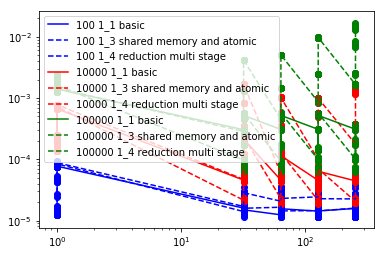

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('stats_part1.csv',header=0,names=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'],dtype={
                     'version': str,
                     'nthread_per_block': int,
                     'nstep_per_thread': int,
                     'num_steps' : int,
                     'runtime' : float
                 })

color_num_steps = {100 : "blue", 10000 : "red", 100000 : "green", 1000000000000 : "black"}
for num_steps in df['num_steps'].drop_duplicates():
    df_plot = df[(df['num_steps'] == int(num_steps))]
    df_plot = df_plot[df_plot['version'] == "1_1 basic"]
    mean_stats = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
    plt.plot(mean_stats['nthread_per_block'], mean_stats['runtime'],linestyle="solid",color=color_num_steps[num_steps],label=f"{num_steps} 1_1 basic")
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(df_plot['nthread_per_block'], df_plot['runtime'],color=color_num_steps[num_steps],label=None)

    df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "1_3 shared memory and atomic")]    
    mean_stats = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()    
    plt.plot(mean_stats['nthread_per_block'], mean_stats['runtime'],linestyle="dashed",color=color_num_steps[num_steps],label=f"{num_steps} 1_3 shared memory and atomic")
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(df_plot['nthread_per_block'], df_plot['runtime'],color=color_num_steps[num_steps],label=None)
    
    df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "1_4 reduction multi stage")]
    mean_stats = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
    plt.plot(mean_stats['nthread_per_block'], mean_stats['runtime'],linestyle="dashed",color=color_num_steps[num_steps],label=f"{num_steps} 1_4 reduction multi stage")
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(df_plot['nthread_per_block'], df_plot['runtime'],color=color_num_steps[num_steps],label=None)

    
plt.xlabel('nb_thread_per_block')
plt.ylabel('runtime')
plt.legend(loc='lower right', bbox_to_anchor=(-0.2, 0))
plt.show()


/tmp/ipykernel_1747/3642313933.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df_plot.append(df_plot2)
/tmp/ipykernel_1747/3642313933.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df_plot.append(df_plot3)


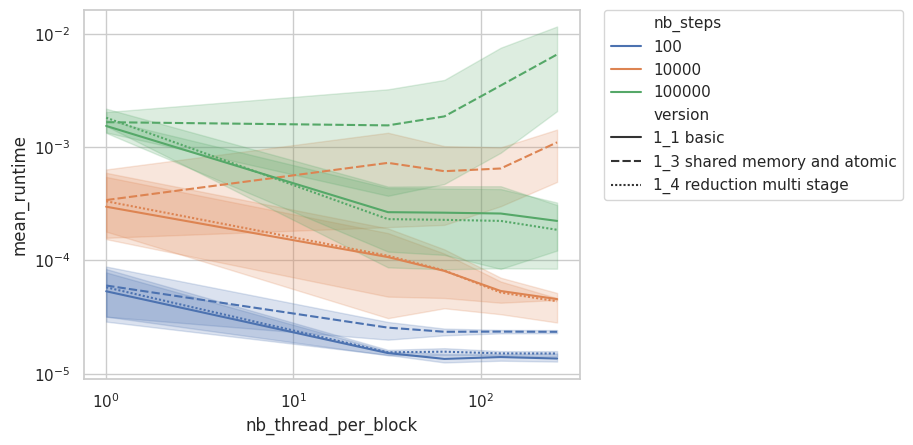

In [11]:
#Do the same as above, but with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd


df = pd.read_csv('stats_part1.csv',header=0,names=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'],dtype={
                        'version': str,
                        'nthread_per_block': int,
                        'nstep_per_thread': int,
                        'num_steps' : int,
                        'runtime' : float
                    })


df_plot = df[(df['version'] == "1_1 basic")]
df_plot = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot['version'] = "1_1 basic"
df_plot = df_plot.rename(columns={"runtime": "mean_runtime"})
df_plot = df_plot.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot = df_plot.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot = df_plot.rename(columns={"num_steps": "nb_steps"})
df_plot = df_plot[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot['nb_steps'] = df_plot['nb_steps'].astype(str)

df_plot2 = df[(df['version'] == "1_3 shared memory and atomic")]
df_plot2 = df_plot2.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot2['version'] = "1_3 shared memory and atomic"
df_plot2 = df_plot2.rename(columns={"runtime": "mean_runtime"})
df_plot2 = df_plot2.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot2 = df_plot2.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot2 = df_plot2.rename(columns={"num_steps": "nb_steps"})
df_plot2 = df_plot2[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot2['nb_steps'] = df_plot2['nb_steps'].astype(str)

df_plot3 = df[(df['version'] == "1_4 reduction multi stage")]
df_plot3 = df_plot3.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot3['version'] = "1_4 reduction multi stage"
df_plot3 = df_plot3.rename(columns={"runtime": "mean_runtime"})
df_plot3 = df_plot3.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot3 = df_plot3.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot3 = df_plot3.rename(columns={"num_steps": "nb_steps"})
df_plot3 = df_plot3[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot3['nb_steps'] = df_plot3['nb_steps'].astype(str)

df_plot = df_plot.append(df_plot2)
df_plot = df_plot.append(df_plot3)

sns.set_theme(style="whitegrid")
ax = sns.lineplot(x="nb_thread_per_block", y="mean_runtime", hue="nb_steps", style="version", data=df_plot)
ax.set_xscale('log')
ax.set_yscale('log')
#make the legend smaller,  more readable outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()



/tmp/ipykernel_1747/2114409693.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df_plot.append(df_plot2)
/tmp/ipykernel_1747/2114409693.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df_plot.append(df_plot3)


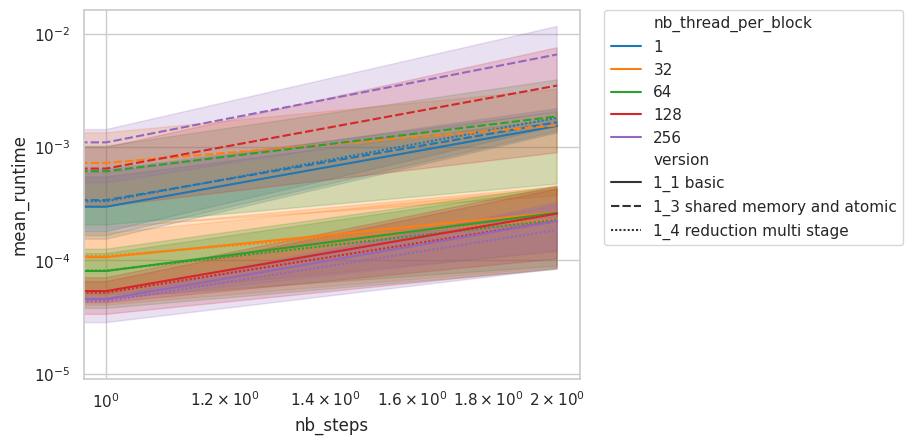

In [25]:
# Do the same as above, but with abscissa as the number of steps
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd


df = pd.read_csv('stats_part1.csv',header=0,names=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'],dtype={
                        'version': str,
                        'nthread_per_block': int,
                        'nstep_per_thread': int,
                        'num_steps' : int,
                        'runtime' : float
                    })


df_plot = df[(df['version'] == "1_1 basic")]
df_plot = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot['version'] = "1_1 basic"
df_plot = df_plot.rename(columns={"runtime": "mean_runtime"})
df_plot = df_plot.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot = df_plot.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot = df_plot.rename(columns={"num_steps": "nb_steps"})
df_plot = df_plot[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot['nb_steps'] = df_plot['nb_steps'].astype(str)

df_plot2 = df[(df['version'] == "1_3 shared memory and atomic")]
df_plot2 = df_plot2.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot2['version'] = "1_3 shared memory and atomic"
df_plot2 = df_plot2.rename(columns={"runtime": "mean_runtime"})
df_plot2 = df_plot2.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot2 = df_plot2.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot2 = df_plot2.rename(columns={"num_steps": "nb_steps"})
df_plot2 = df_plot2[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot2['nb_steps'] = df_plot2['nb_steps'].astype(str)

df_plot3 = df[(df['version'] == "1_4 reduction multi stage")]
df_plot3 = df_plot3.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot3['version'] = "1_4 reduction multi stage"
df_plot3 = df_plot3.rename(columns={"runtime": "mean_runtime"})
df_plot3 = df_plot3.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot3 = df_plot3.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot3 = df_plot3.rename(columns={"num_steps": "nb_steps"})
df_plot3 = df_plot3[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot3['nb_steps'] = df_plot3['nb_steps'].astype(str)

df_plot = df_plot.append(df_plot2)
df_plot = df_plot.append(df_plot3)

sns.set_theme(style="whitegrid")


ax = sns.lineplot(x="nb_steps", y="mean_runtime", hue="nb_thread_per_block", style="version", data=df_plot, palette="tab10")

ax.set_xscale('log')
ax.set_yscale('log')
#make the legend smaller,  more readable outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


/tmp/ipykernel_1747/107662891.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df_plot.append(df_plot2)
/tmp/ipykernel_1747/107662891.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df_plot.append(df_plot3)


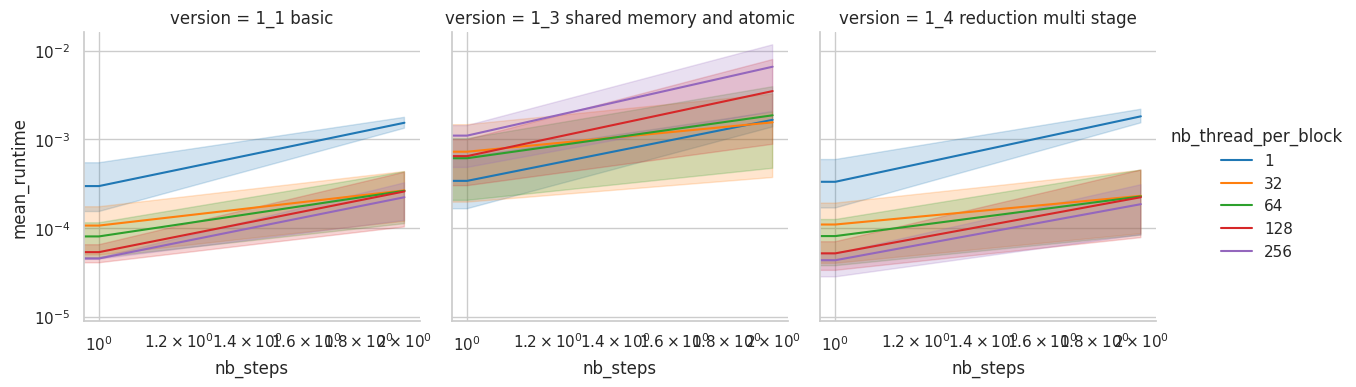

In [35]:
#plot the same as above, but each version in a different plot

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd


df = pd.read_csv('stats_part1.csv',header=0,names=['version','nthread_per_block','nstep_per_thread','num_steps','runtime'],dtype={
                        'version': str,
                        'nthread_per_block': int,
                        'nstep_per_thread': int,
                        'num_steps' : int,
                        'runtime' : float
                    })


df_plot = df[(df['version'] == "1_1 basic")]
df_plot = df_plot.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot['version'] = "1_1 basic"
df_plot = df_plot.rename(columns={"runtime": "mean_runtime"})
df_plot = df_plot.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot = df_plot.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot = df_plot.rename(columns={"num_steps": "nb_steps"})
df_plot = df_plot[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot['nb_steps'] = df_plot['nb_steps'].astype(str)

df_plot2 = df[(df['version'] == "1_3 shared memory and atomic")]
df_plot2 = df_plot2.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot2['version'] = "1_3 shared memory and atomic"
df_plot2 = df_plot2.rename(columns={"runtime": "mean_runtime"})
df_plot2 = df_plot2.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot2 = df_plot2.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot2 = df_plot2.rename(columns={"num_steps": "nb_steps"})
df_plot2 = df_plot2[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot2['nb_steps'] = df_plot2['nb_steps'].astype(str)

df_plot3 = df[(df['version'] == "1_4 reduction multi stage")]
df_plot3 = df_plot3.groupby(['num_steps','version','nthread_per_block','nstep_per_thread']).mean().reset_index()
df_plot3['version'] = "1_4 reduction multi stage"
df_plot3 = df_plot3.rename(columns={"runtime": "mean_runtime"})
df_plot3 = df_plot3.rename(columns={"nthread_per_block": "nb_thread_per_block"})
df_plot3 = df_plot3.rename(columns={"nstep_per_thread": "nb_step_per_thread"})
df_plot3 = df_plot3.rename(columns={"num_steps": "nb_steps"})
df_plot3 = df_plot3[['version','nb_thread_per_block','nb_step_per_thread','nb_steps','mean_runtime']]
df_plot3['nb_steps'] = df_plot3['nb_steps'].astype(str)


df_plot = df_plot.append(df_plot2)
df_plot = df_plot.append(df_plot3)

sns.set_theme(style="whitegrid")

g = sns.FacetGrid(df_plot, col="version", hue="nb_thread_per_block", col_wrap=3, height=4, sharex=False, sharey=True, palette="tab10")
#Change the color by the number of thread per block
g.map_dataframe(sns.lineplot, x="nb_steps", y="mean_runtime", style="version", data=df_plot)
g.set(xscale="log", yscale="log")
g.add_legend()
plt.show()



### Discussion

#### Basic
...

#### Shared memory and atomic operation
...

#### Redcuction multi stage
...


## Part 2 : Matrix-Vector operation
### Compilation

In [4]:
!nvcc -o tp_cuda_part_2_1_vector part2/tp_cuda_part_2_1_vector.cu -O3
!nvcc -o tp_cuda_part_2_2_vector part2/tp_cuda_part_2_2_vector.cu -O3
!nvcc -o tp_cuda_part_2_3_vector part2/tp_cuda_part_2_3_vector.cu -O3
!nvcc -o tp_cuda_part_2_4_vector part2/tp_cuda_part_2_4_vector.cu -O3

part2/tp_cuda_part_2_3_vector.cu(143): warning #177-D: variable "sum" was declared but never referenced



### Performance evaluation

In [5]:
import os
import subprocess
import pandas as pd
from tqdm import tqdm
try:
    os.remove("stats_part2.csv")
except OSError:
    pass

df = pd.DataFrame(columns=['version','nb_thread_per_block','N','M','repeat','runtime'])
df.to_csv("stats_part2.csv", index=False)

nb_threads_per_block = [1, 32, 64, 128, 256]
N = [2,4,8,10,12,14]
repeats = range(0,10)

for n in tqdm(N):
    for nthread_per_block in nb_threads_per_block:
        for repeat in repeats:
            args = ("./tp_cuda_part_2_1_vector","-tpb", str(nthread_per_block), "-N", str(n), "-M", str(n-1))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("./tp_cuda_part_2_2_vector","-tpb", str(nthread_per_block), "-N", str(n), "-M", str(n-1))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("./tp_cuda_part_2_3_vector","-tpb", str(nthread_per_block), "-N", str(n), "-M", str(n-1))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("./tp_cuda_part_2_4_vector","-tpb", str(nthread_per_block), "-N", str(n), "-M", str(n-1))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()



100%|██████████| 6/6 [35:34<00:00, 355.73s/it]


### Performance analysis

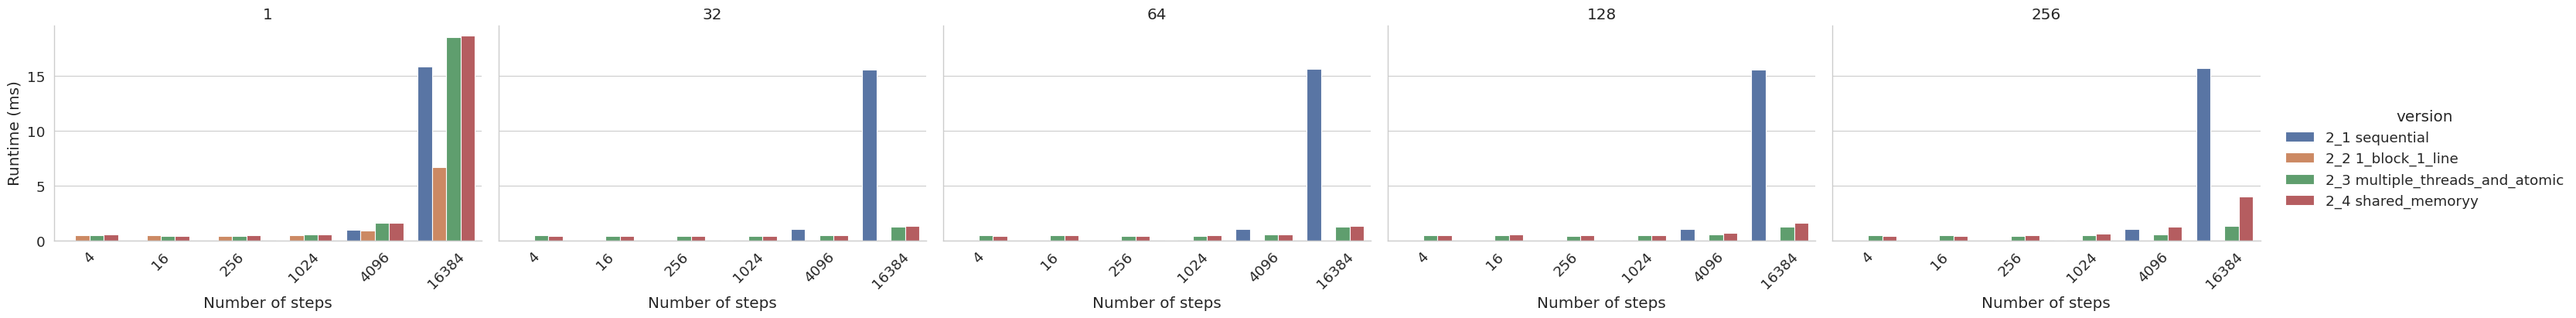

In [33]:
#plot runtime of the the Version and the number of thread per block vs N
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("stats_part2.csv")

df_plot = df[(df['version'] == "2_1 sequential")]
df_plot = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
df_plot['version'] = "2_1 sequential"
df_plot = df_plot.rename(columns={"runtime": "mean_runtime"})
df_plot = df_plot.rename(columns={"nb_thread_per_block": "nb_thread_per_block"})
df_plot = df_plot.rename(columns={"N": "nb_steps"})
df_plot = df_plot[['version','nb_thread_per_block','nb_steps','mean_runtime']]
df_plot['nb_steps'] = df_plot['nb_steps'].astype(str)

df_plot2 = df[(df['version'] == "2_2 1_block_1_line")]
df_plot2 = df_plot2.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
df_plot2['version'] = "2_2 1_block_1_line"
df_plot2 = df_plot2.rename(columns={"runtime": "mean_runtime"})
df_plot2 = df_plot2.rename(columns={"nb_thread_per_block": "nb_thread_per_block"})
df_plot2 = df_plot2.rename(columns={"N": "nb_steps"})
df_plot2 = df_plot2[['version','nb_thread_per_block','nb_steps','mean_runtime']]
df_plot2['nb_steps'] = df_plot2['nb_steps'].astype(str)

df_plot3 = df[(df['version'] == "2_3 multiple_threads_and_atomic")]
df_plot3 = df_plot3.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
df_plot3['version'] = "2_3 multiple_threads_and_atomic"
df_plot3 = df_plot3.rename(columns={"runtime": "mean_runtime"})
df_plot3 = df_plot3.rename(columns={"nb_thread_per_block": "nb_thread_per_block"})
df_plot3 = df_plot3.rename(columns={"N": "nb_steps"})
df_plot3 = df_plot3[['version','nb_thread_per_block','nb_steps','mean_runtime']]
df_plot3['nb_steps'] = df_plot3['nb_steps'].astype(str)

df_plot4 = df[(df['version'] == "2_4 shared_memory")]
df_plot4 = df_plot4.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
df_plot4['version'] = "2_4 shared_memoryy"
df_plot4 = df_plot4.rename(columns={"runtime": "mean_runtime"})
df_plot4 = df_plot4.rename(columns={"nb_thread_per_block": "nb_thread_per_block"})
df_plot4 = df_plot4.rename(columns={"N": "nb_steps"})
df_plot4 = df_plot4[['version','nb_thread_per_block','nb_steps','mean_runtime']]
df_plot4['nb_steps'] = df_plot4['nb_steps'].astype(str)

df_plot = df_plot.append(df_plot2)
df_plot = df_plot.append(df_plot3)
df_plot = df_plot.append(df_plot4)

sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
g = sns.catplot(x="nb_steps", y="mean_runtime", hue="version", col="nb_thread_per_block", data=df_plot, kind="bar", height=4, aspect=1.5)

g.set_axis_labels("Number of steps", "Runtime (ms)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
plt.show()




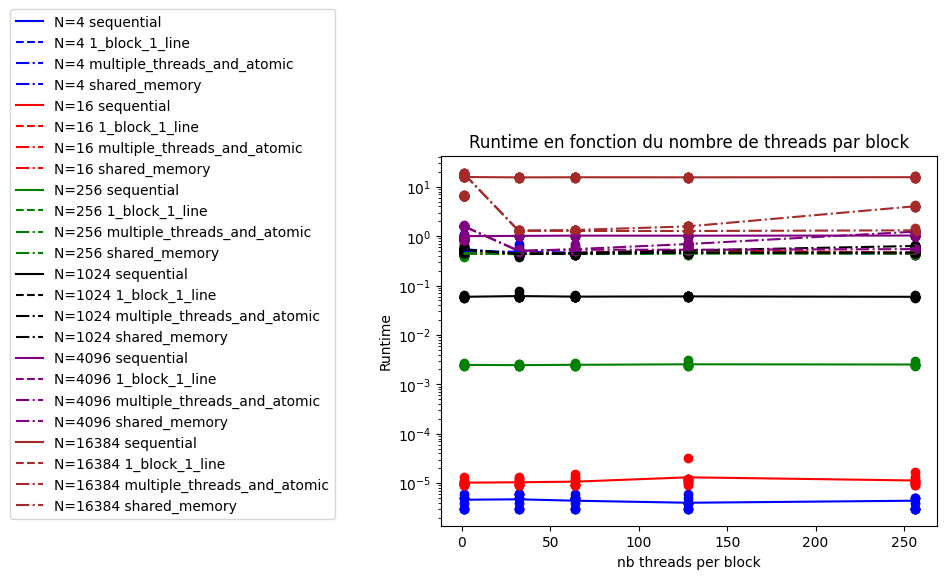

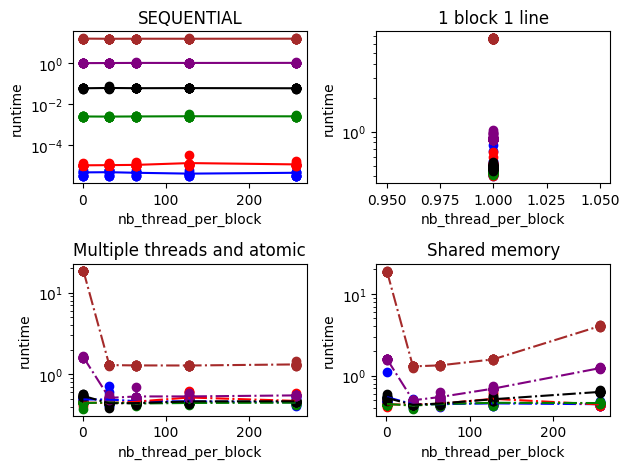

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('stats_part2.csv',header=0,names=['version','nb_thread_per_block','N','M','repeat','runtime'],dtype={
                     'version' : str,
                     'nb_thread_per_block':int,
                     'N': int,
                     'M': int,
                     'repeat' : int,
                     'runtime' : float
                 })

color_n_m = {2**2 : "blue", 2**4 : "red", 2**8 : "green", 2**10 : "black", 2**12 : "purple", 2**14 :"brown", 2**16:"pink"}

for N in df['N'].drop_duplicates():
    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_1 sequential"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    plt.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="solid", label=f'N={N} sequential', color=color_n_m[N])
    plt.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])

    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_2 1_block_1_line"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    plt.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="dashed", label=f'N={N} 1_block_1_line', color = color_n_m[N])
    plt.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])

    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_3 multiple_threads_and_atomic"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    plt.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="dashdot", label=f'N={N} multiple_threads_and_atomic', color = color_n_m[N])
    plt.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])

    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_4 shared_memory"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    plt.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="dashdot", label=f'N={N} shared_memory', color = color_n_m[N])
    plt.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])

plt.yscale('log')
plt.xlabel('nb threads per block')
plt.ylabel('Runtime')
plt.title("Runtime en fonction du nombre de threads par block")
plt.legend(loc='lower right', bbox_to_anchor=(-0.2, 0))

fig = plt.figure()

#4x4 grid sublplot
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


for N in df['N'].drop_duplicates():
    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_1 sequential"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax1.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="solid", label=f'{N} sequential', color=color_n_m[N])
    ax1.set_yscale('log')
    ax1.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])
    ax1.set_title("SEQUENTIAL")
    ax1.set_xlabel("nb_thread_per_block")
    ax1.set_ylabel("runtime")

for N in df['N'].drop_duplicates():
    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_2 1_block_1_line"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax2.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="dashed", label=f'{N} 1_block_1_line', color = color_n_m[N])
    ax2.set_yscale('log')
    ax2.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])
    ax2.set_title("1 block 1 line")
    ax2.set_xlabel("nb_thread_per_block")
    ax2.set_ylabel("runtime")

for N in df['N'].drop_duplicates():
    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_3 multiple_threads_and_atomic"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax3.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="dashdot", label=f'{N} multiple_threads_and_atomic', color = color_n_m[N])
    ax3.set_yscale('log')
    ax3.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])
    ax3.set_title("Multiple threads and atomic")
    ax3.set_xlabel("nb_thread_per_block")
    ax3.set_ylabel("runtime")

for N in df['N'].drop_duplicates():
    df_plot = df[(df['N'] == int(N))]
    df_plot = df_plot[df_plot['version'] == "2_4 shared_memory"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax4.plot(mean_stats['nb_thread_per_block'], mean_stats['runtime'],linestyle="dashdot", label=f'{N} shared_memory', color = color_n_m[N])
    ax4.set_yscale('log')
    ax4.scatter(df_plot['nb_thread_per_block'], df_plot['runtime'], label=None, color = color_n_m[N])
    ax4.set_title("Shared memory")
    ax4.set_xlabel("nb_thread_per_block")
    ax4.set_ylabel("runtime")


plt.tight_layout()
plt.show()

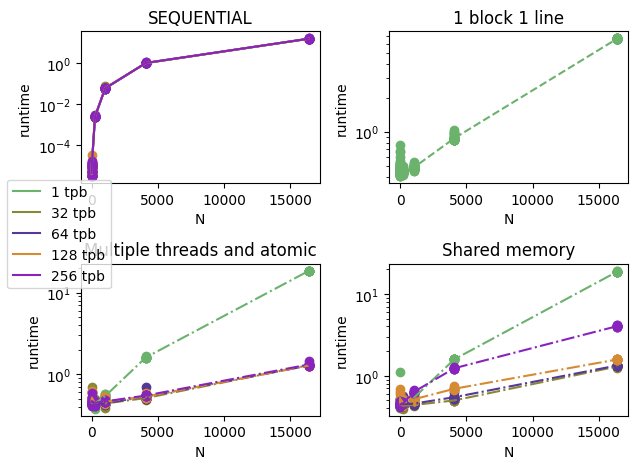

In [31]:
#Do the same as above but vs N
fig = plt.figure()

#4x4 grid sublplot
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

color_tpb = {}
for nb_thread_per_block in df['nb_thread_per_block'].drop_duplicates():
    color_tpb[nb_thread_per_block] = np.random.rand(3,)

for nb_thread_per_block in df['nb_thread_per_block'].drop_duplicates():
    df_plot = df[(df['nb_thread_per_block'] == int(nb_thread_per_block))]
    df_plot = df_plot[df_plot['version'] == "2_1 sequential"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax1.plot(mean_stats['N'], mean_stats['runtime'],linestyle="solid", label=f'{nb_thread_per_block} sequential', color=color_tpb[nb_thread_per_block])
    ax1.set_yscale('log')
    ax1.scatter(df_plot['N'], df_plot['runtime'], label=None, color = color_tpb[nb_thread_per_block])
    ax1.set_title("SEQUENTIAL")
    ax1.set_xlabel("N")
    ax1.set_ylabel("runtime")

for nb_thread_per_block in df['nb_thread_per_block'].drop_duplicates():
    df_plot = df[(df['nb_thread_per_block'] == int(nb_thread_per_block))]
    df_plot = df_plot[df_plot['version'] == "2_2 1_block_1_line"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax2.plot(mean_stats['N'], mean_stats['runtime'],linestyle="dashed", label=f'{nb_thread_per_block} 1_block_1_line', color = color_tpb[nb_thread_per_block])
    ax2.set_yscale('log')
    ax2.scatter(df_plot['N'], df_plot['runtime'], label=None, color = color_tpb[nb_thread_per_block])
    ax2.set_title("1 block 1 line")
    ax2.set_xlabel("N")
    ax2.set_ylabel("runtime")

for nb_thread_per_block in df['nb_thread_per_block'].drop_duplicates():
    df_plot = df[(df['nb_thread_per_block'] == int(nb_thread_per_block))]
    df_plot = df_plot[df_plot['version'] == "2_3 multiple_threads_and_atomic"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax3.plot(mean_stats['N'], mean_stats['runtime'],linestyle="dashdot", label=f'{nb_thread_per_block} multiple_threads_and_atomic', color = color_tpb[nb_thread_per_block])
    ax3.set_yscale('log')
    ax3.scatter(df_plot['N'], df_plot['runtime'], label=None, color = color_tpb[nb_thread_per_block])
    ax3.set_title("Multiple threads and atomic")
    ax3.set_xlabel("N")
    ax3.set_ylabel("runtime")

for nb_thread_per_block in df['nb_thread_per_block'].drop_duplicates():
    df_plot = df[(df['nb_thread_per_block'] == int(nb_thread_per_block))]
    df_plot = df_plot[df_plot['version'] == "2_4 shared_memory"]
    mean_stats = df_plot.groupby(['N','version','nb_thread_per_block']).mean().reset_index()
    ax4.plot(mean_stats['N'], mean_stats['runtime'],linestyle="dashdot", label=f'{nb_thread_per_block} shared_memory', color = color_tpb[nb_thread_per_block])
    ax4.set_yscale('log')
    ax4.scatter(df_plot['N'], df_plot['runtime'], label=None, color = color_tpb[nb_thread_per_block])
    ax4.set_title("Shared memory")
    ax4.set_xlabel("N")
    ax4.set_ylabel("runtime")


handles, labels = ax1.get_legend_handles_labels()
#replace labels onl the nb thread per block
labels = [label.split()[0] + " tpb" for label in labels]
#put the legend on the right outside the plot
fig.legend(handles, labels, loc='center left')




plt.tight_layout()
plt.show()


### Discussion
#### Sequential
...

#### 1 block 1 line
...

#### Multiple threads and atomic operation
...

#### Shared memory
...